#  Model Development

In [40]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as XGB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
X = pd.read_csv("X.csv").drop(columns=["Unnamed: 0"])
# X

In [3]:
y = pd.read_csv("y.csv").drop(columns=["Unnamed: 0"])
y = y["price_in_lakhs"]

In [4]:
feature_names = X.columns
feature_names

Index(['Width', 'Reg_age', 'Length', 'Alloy Wheel Size', 'Wheel Size', 'rpm',
       'km', 'City', 'Torque', 'Top Speed', 'Mileage', 'model', 'Height',
       'Engine and Transmission', 'Transmission', 'Displacement', 'Engine'],
      dtype='object')

## a) Train-Test Split:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5959, 17), (1490, 17), (5959,), (1490,))

## b) Model Selection

## 1. Random Forest Regressor

In [6]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [7]:
rf_pred = rf.predict(X_test)
rf_pred

array([7.727 , 5.482 , 6.562 , ..., 4.254 , 4.3184, 5.2288])

In [8]:
r2_score(y_test,rf_pred)

0.9000381292778986

In [9]:
#mape

100-((abs(y_test-rf_pred)/y_test)*100).mean()

86.43103926473664

In [10]:
#mse
np.sqrt(mean_squared_error(y_test,rf_pred))

1.1727860408769948

In [11]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.060 seconds


In [12]:
importances

array([0.42315403, 0.21026332, 0.08300002, 0.04797689, 0.04973583,
       0.03132559, 0.02921827, 0.02441765, 0.01747236, 0.01464619,
       0.01492659, 0.01608103, 0.01243128, 0.00787838, 0.00608209,
       0.00626417, 0.00512633])

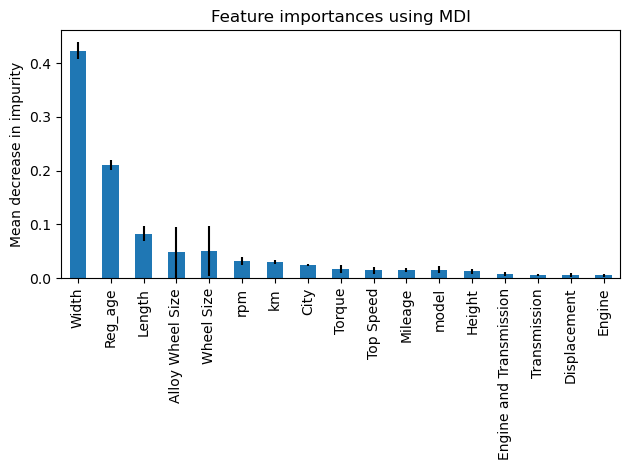

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 2. Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([6.9073563 , 7.14165538, 6.86129821, ..., 3.37634314, 4.72685811,
       8.50268263])

In [15]:
r2_score(y_test,lr_pred)

0.7598981979879458

In [16]:
#mape

100-((abs(y_test-lr_pred)/y_test)*100).mean()

72.12802422204929

In [17]:
#mse
np.sqrt(mean_squared_error(y_test,lr_pred))

1.8176041698030219

## 3. Decision Trees

In [18]:
dtr = DecisionTreeRegressor()
# regr_2 = DecisionTreeRegressor(max_depth=10)

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred

array([8.21, 4.25, 6.6 , ..., 4.75, 6.  , 4.  ])

In [19]:
r2_score(y_test,dtr_pred)

0.8184057372537364

In [20]:
#mape

100-((abs(y_test-dtr_pred)/y_test)*100).mean()

82.1639292338208

In [21]:
#mse
np.sqrt(mean_squared_error(y_test,dtr_pred))

1.5807116797872907

## 4. Gradient Boosting Machines

## i) GBR

In [22]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
gb_pred

array([7.73036327, 5.61820341, 6.55581756, ..., 3.92482886, 4.02752247,
       7.30993025])

In [23]:
r2_score(y_test,gb_pred)

0.8979724289670089

In [24]:
#mape

100-((abs(y_test-gb_pred)/y_test)*100).mean()

85.25607530904229

In [25]:
#mse
np.sqrt(mean_squared_error(y_test,gb_pred))

1.1848418194039

## ii) XGB

In [26]:
xgb = XGB.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
xgb_pred = xgb.predict(X_test)

In [28]:
r2_score(y_test,xgb_pred)

0.8958659230365571

In [29]:
#mape

100-((abs(y_test-xgb_pred)/y_test)*100).mean()

85.15937398599894

In [30]:
#mse
np.sqrt(mean_squared_error(y_test,xgb_pred))

1.1970107108845658

## Linear Regression With Cross Vaidation

In [33]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.77262741, 0.75775987, 0.77639634, 0.74607448, 0.75814597])

In [41]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [45]:
lr_cv_pred = model_cv.predict(X_test)
lr_cv_pred

array([7.1205334 , 7.2071324 , 6.90797321, ..., 2.91838553, 4.95181487,
       8.68921145])

In [46]:
r2_score(y_test,lr_cv_pred)

0.750782831705372

In [47]:
#mape

100-((abs(y_test-lr_cv_pred)/y_test)*100).mean()

72.0221022766242

## Random Forest Regressor with Cross Validation